# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

# Necessary Functions

In [25]:
def correlation_maker(df):
    correlation = df.corr().round(2)
    plt.figure(figsize = (19,7))
    sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [26]:
def null_counter(df):
    for col in df.columns:
        print(col)
        print(df[str(col)].isnull().sum())

In [27]:
def Select_Best_Features(df,x,y,number_of_features = 10):
    # find best scored 5 features
    select_feature = SelectKBest(chi2,k=number_of_features).fit(x, y)
    #print('Score list:', select_feature.scores_)
    #print('Feature list:', df.columns)
    score_list = select_feature.scores_
    column_list = df.columns.tolist()
    #print(column_list)
    #print(score_list)
    sortlist = [x for _, x in sorted(zip(score_list, column_list),reverse=True)]
    # Display list
    #print(sortlist)
    return sortlist[:number_of_features]
    #print(sortlist)

# Dataset Loading

In [28]:
data = pd.read_csv('./Dataset/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Changing Label Encoding

In [29]:
data['diagnosis'] = data['diagnosis'].replace({'M':1, 'B':0})

# Splitting Data and Label

In [30]:
#Splitting Data and Label
y = data.diagnosis# M or B 
#Removing Unnecessary Columns
listo = ['id','diagnosis']
x = data.drop(listo,axis = 1 )
print(x.columns)
#print(x.describe())

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Correlation Map

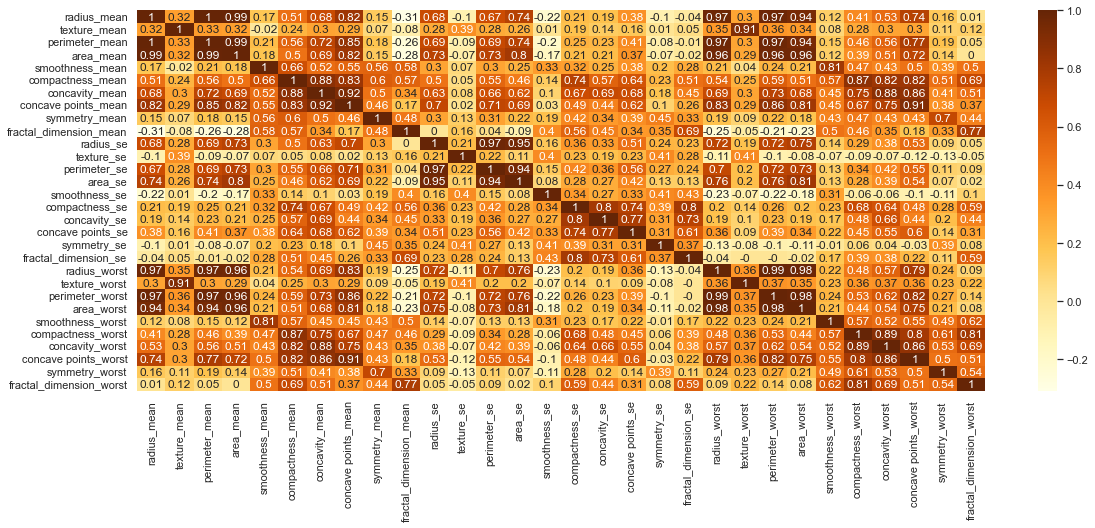

In [31]:
correlation_maker(x)

# Label Count Plot

Number of Benign:  357
Number of Malignant :  212


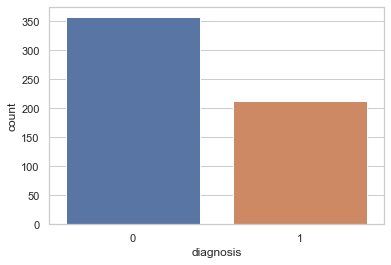

In [32]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

# Standardization

In [33]:
x[x.columns.tolist()] = MinMaxScaler().fit_transform(x[x.columns.tolist()])


# KDE plot

<AxesSubplot:ylabel='Density'>

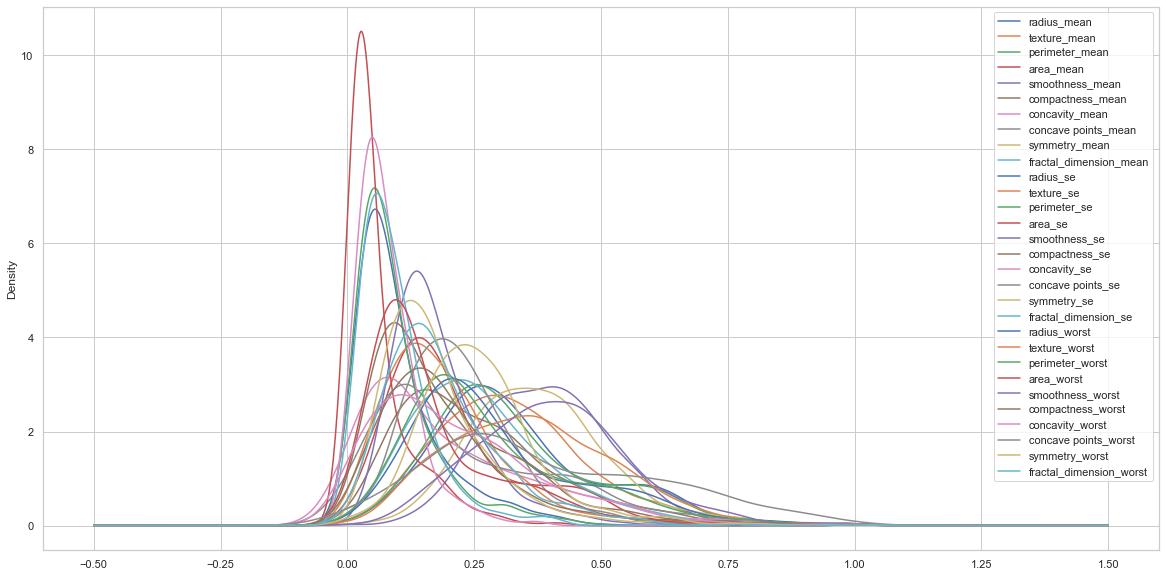

In [34]:
x.plot.kde(figsize=(20, 10))

# Box Plot

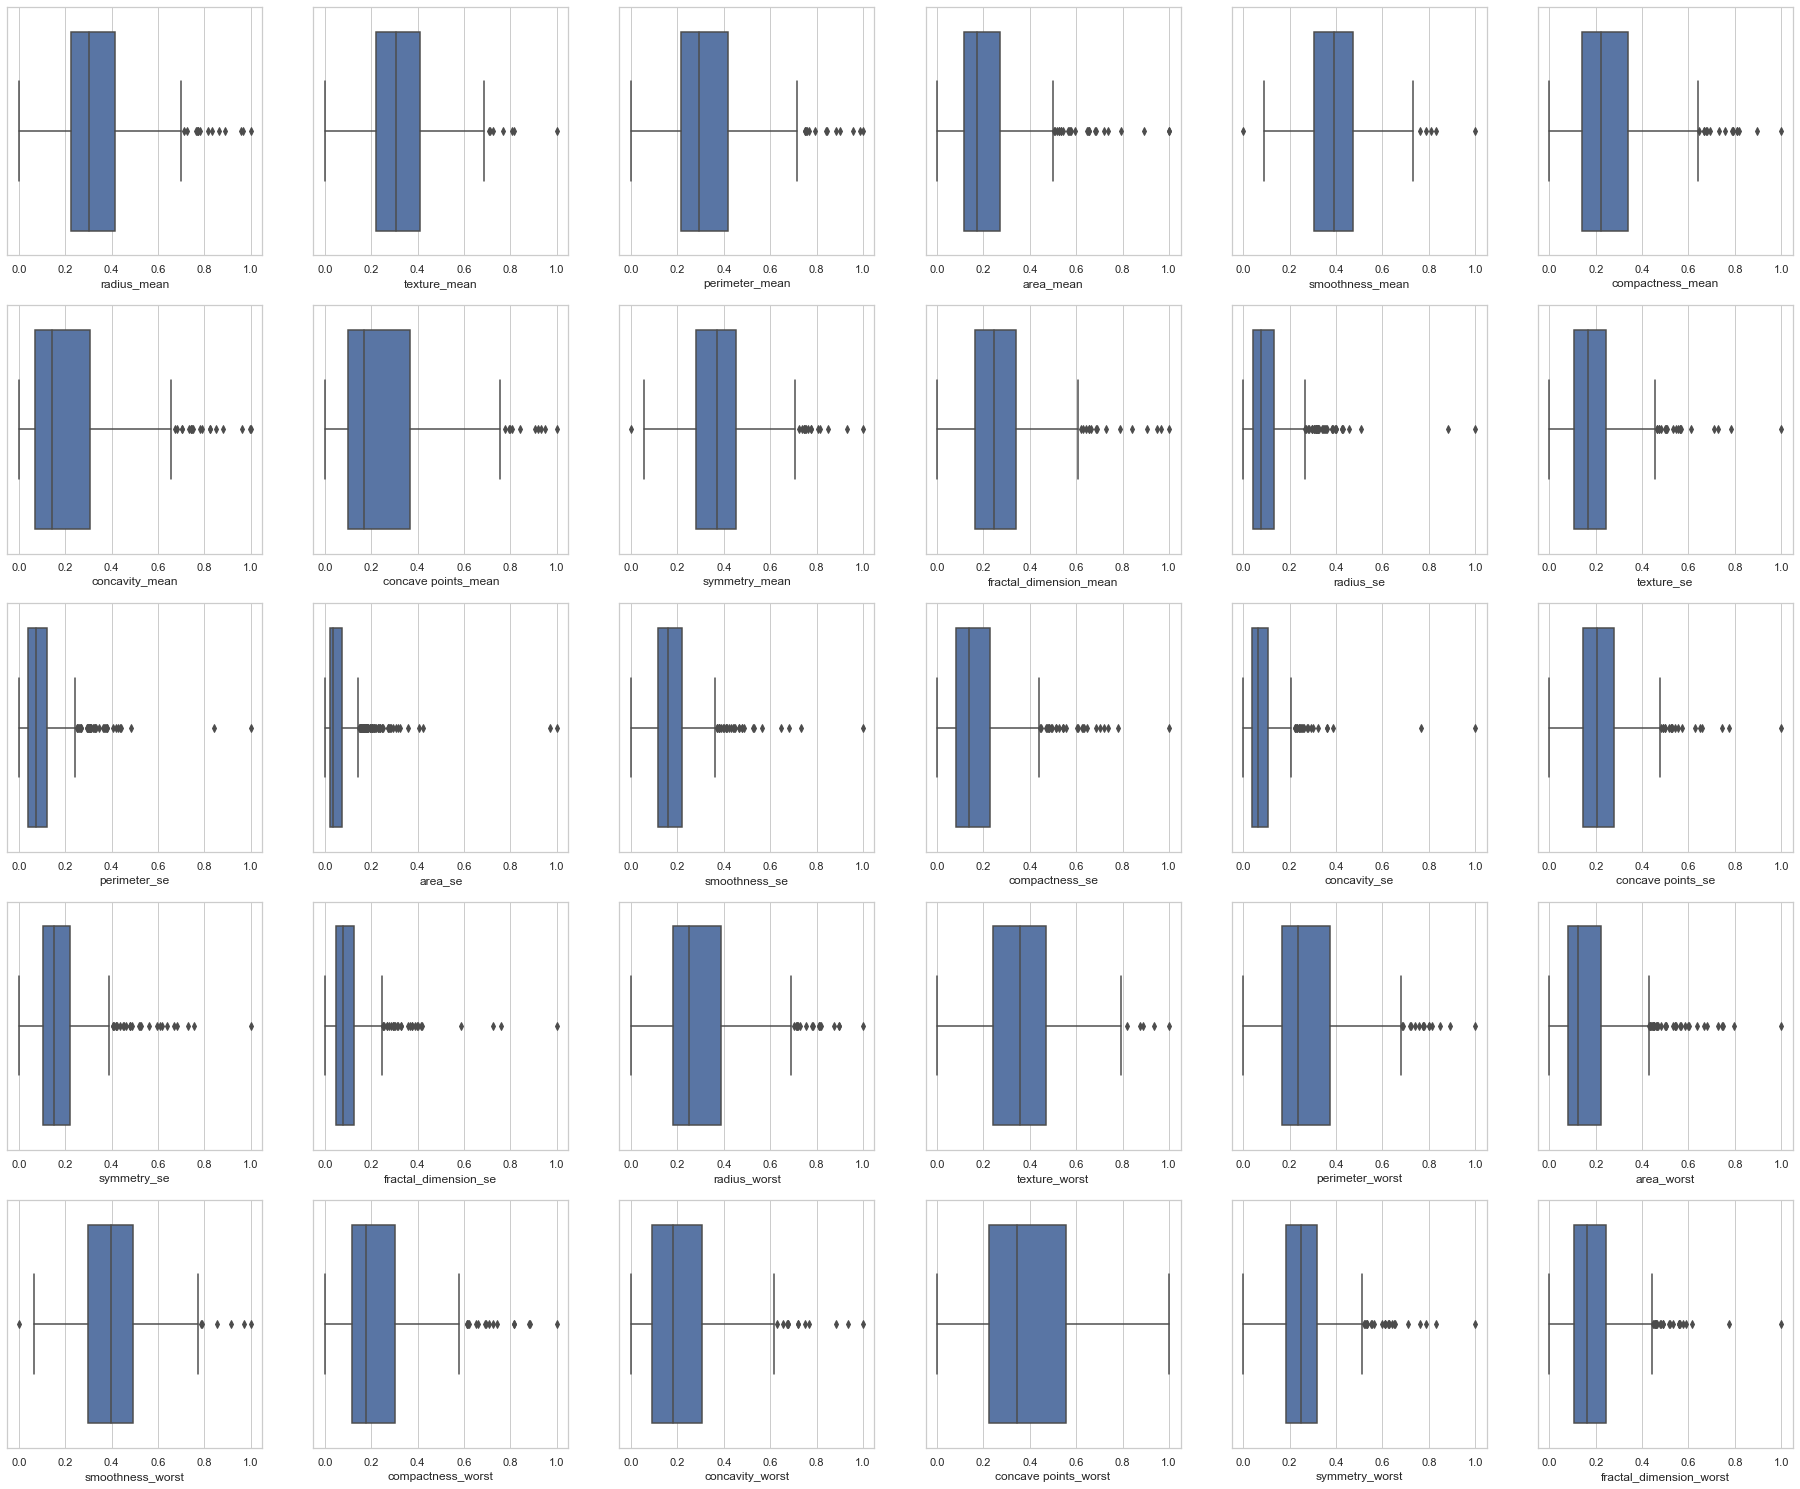

In [35]:
plt.figure(figsize=(32,32))
for i,val in enumerate(x.columns):
    sns.set_theme(style="whitegrid")
    plt.subplot(6, 6, i+1)
    ax = sns.boxplot(x=x[str(val)])
    #plt.subplot(1, 2, 1)
plt.show()

## Violin Plot

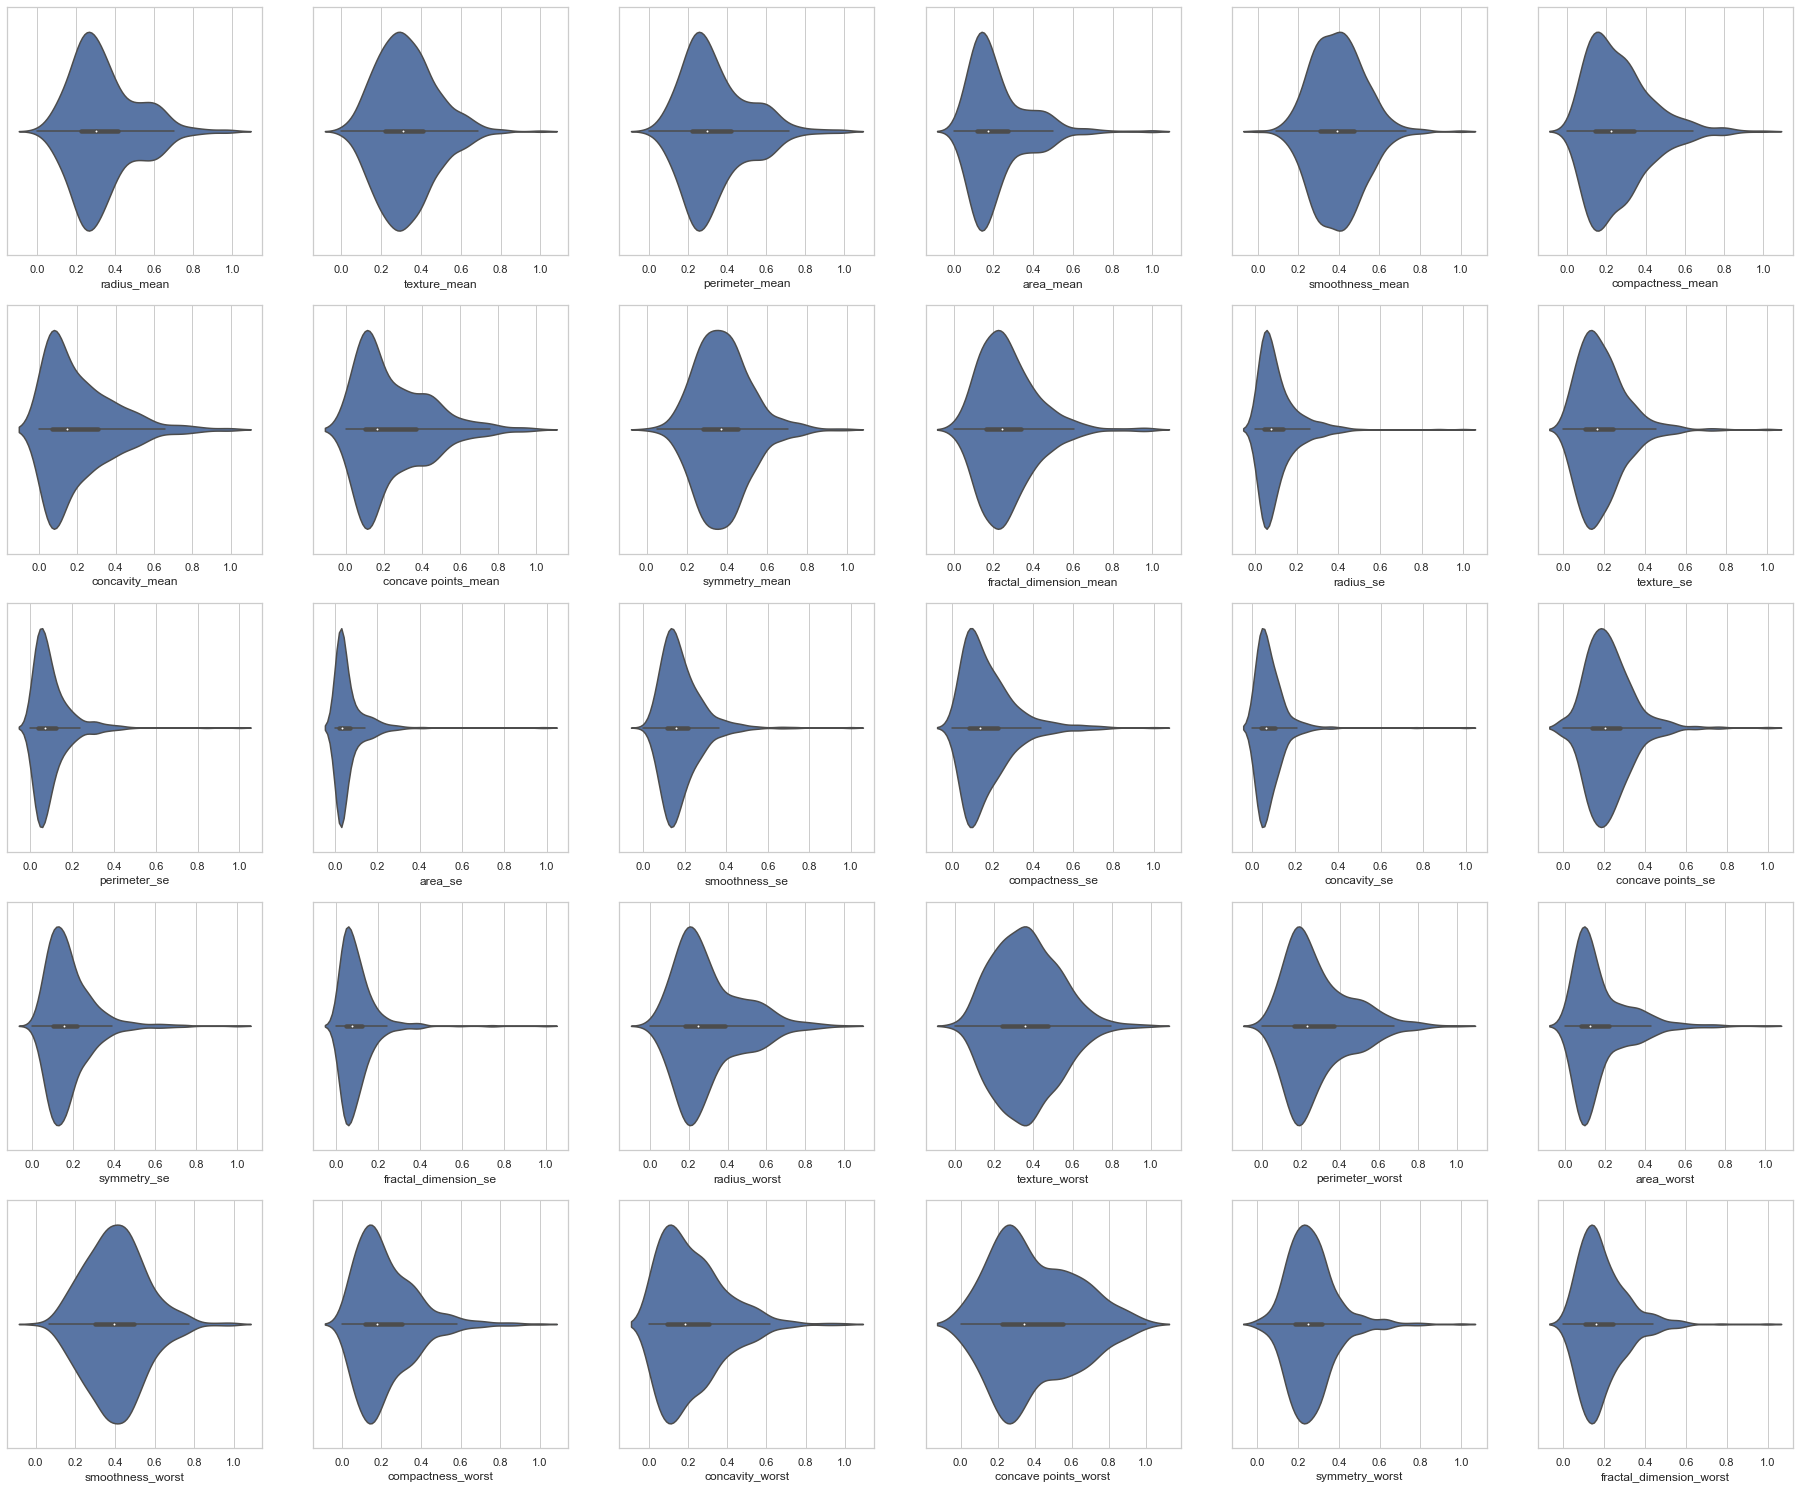

In [36]:
plt.figure(figsize=(32,32))
for i,val in enumerate(x.columns):
    sns.set_theme(style="whitegrid")
    plt.subplot(6, 6, i+1)
    ax = sns.violinplot(x=x[str(val)])
    #plt.subplot(1, 2, 1)
plt.show()

# Selecting K Best Features

In [37]:
best_feature_column_list = Select_Best_Features(x,x,y,10)

In [38]:
print(best_feature_column_list)

['concave points_mean', 'concave points_worst', 'concavity_mean', 'area_worst', 'perimeter_worst', 'radius_worst', 'concavity_worst', 'area_mean', 'perimeter_mean', 'radius_mean']


In [39]:
K_best_feature_data = data[np.intersect1d(data.columns,best_feature_column_list)]
#print(K_best_feature_data)

# Grid Search and Finding Best Parameter

In [40]:
#Select Features
X = K_best_feature_data
print(X.shape)
print(y.shape)
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

(569, 10)
(569,)
tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9613569321533924


In [41]:
print(logreg_cv.best_params_['C'])
print(logreg_cv.best_params_['penalty'])
print(logreg_cv.best_params_['solver'])

10.0
l1
liblinear


# Dataset Split on train/test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle = True, test_size = .2, random_state = 44)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (455, 10)
Shape of testing feature: (114, 10)
Shape of training label: (455,)
Shape of training label: (114,)


In [43]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=logreg_cv.best_params_['C'],penalty=logreg_cv.best_params_['penalty'],solver=logreg_cv.best_params_['solver'],random_state=17, n_jobs=4)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# Evaluation

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9230769230769231


In [45]:
cm = metrics.confusion_matrix(y_test, y_pred)

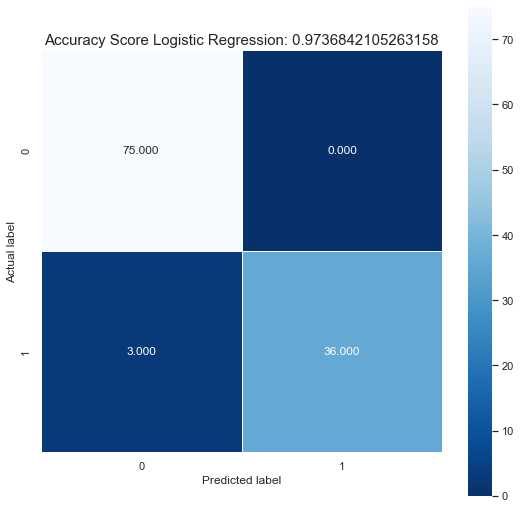

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Logistic Regression: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);